In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Load the data
# file_path = "Superstore.xlsx"   # adjust path if needed
df = pd.read_csv('Superstore.csv',encoding="cp1252")

In [3]:
print("=== DATAFRAME SHAPE ===")
print("Rows, Columns:", df.shape)
print("\n=== DATA TYPES ===")
print(df.dtypes)
print("\n=== FIRST 5 ROWS ===")
print(df.head())

=== DATAFRAME SHAPE ===
Rows, Columns: (9994, 21)

=== DATA TYPES ===
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

=== FIRST 5 ROWS ===
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/

In [4]:
cols = ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Segment', 'Country', 'City', 'State', 'Region',
        'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']

In [5]:
df_sel = df[cols].copy()


df_sel['Order Date'] = pd.to_datetime(df_sel['Order Date'], errors='coerce')
df_sel['Ship Date'] = pd.to_datetime(df_sel['Ship Date'], errors='coerce')
missing_counts = df_sel.isnull().sum()
missing_pct = (missing_counts / len(df_sel) * 100).round(2)

In [6]:
print("\n=== MISSING VALUES PER COLUMN ===")
print(pd.concat([missing_counts, missing_pct.rename('percent')], axis=1))


numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
print("\n=== NUMERIC SUMMARY STATISTICS ===")
print(df_sel[numeric_cols].describe().T)


skewness = df_sel[numeric_cols].skew().rename('skewness')
kurtosis = df_sel[numeric_cols].kurt().rename('kurtosis')
print("\n=== SKEWNESS & KURTOSIS ===")
print(pd.concat([skewness, kurtosis], axis=1))



=== MISSING VALUES PER COLUMN ===
              0  percent
Order ID      0      0.0
Order Date    0      0.0
Ship Date     0      0.0
Ship Mode     0      0.0
Customer ID   0      0.0
Segment       0      0.0
Country       0      0.0
City          0      0.0
State         0      0.0
Region        0      0.0
Category      0      0.0
Sub-Category  0      0.0
Sales         0      0.0
Quantity      0      0.0
Discount      0      0.0
Profit        0      0.0

=== NUMERIC SUMMARY STATISTICS ===
           count        mean         std       min       25%      50%  \
Sales     9994.0  229.858001  623.245101     0.444  17.28000  54.4900   
Quantity  9994.0    3.789574    2.225110     1.000   2.00000   3.0000   
Discount  9994.0    0.156203    0.206452     0.000   0.00000   0.2000   
Profit    9994.0   28.656896  234.260108 -6599.978   1.72875   8.6665   

              75%        max  
Sales     209.940  22638.480  
Quantity    5.000     14.000  
Discount    0.200      0.800  
Profit     29.

In [7]:
categorical_cols = ['Segment', 'Region', 'Category', 'Sub-Category', 'Ship Mode']
for cat in categorical_cols:
    print(f"\n=== VALUE COUNTS FOR {cat} ===")
    print(df_sel[cat].value_counts(dropna=False).head(10))

# 8. Duplicate check
dup_count = df_sel.duplicated().sum()
print(f"\n\nNumber of fully duplicated rows: {dup_count}")


=== VALUE COUNTS FOR Segment ===
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

=== VALUE COUNTS FOR Region ===
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

=== VALUE COUNTS FOR Category ===
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

=== VALUE COUNTS FOR Sub-Category ===
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Name: count, dtype: int64

=== VALUE COUNTS FOR Ship Mode ===
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


Number of fully duplicated rows: 1


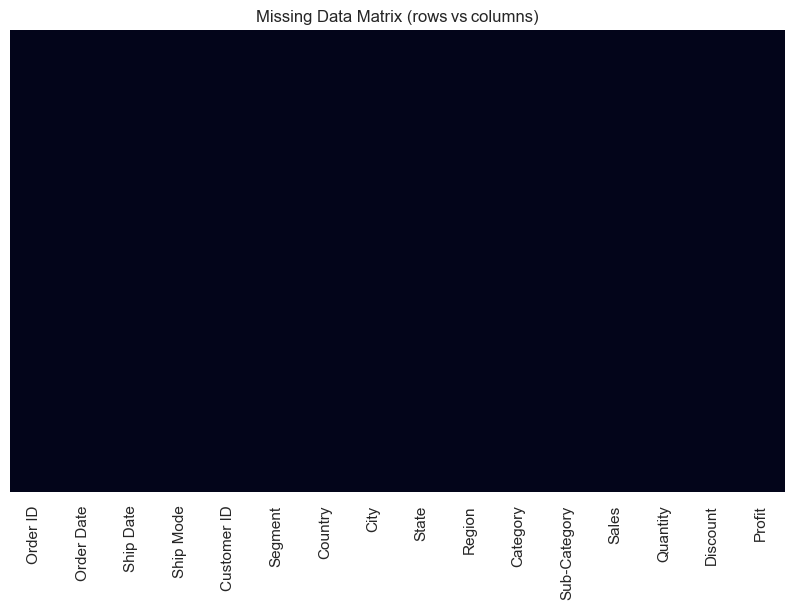

In [8]:
plt.figure()
sns.heatmap(df_sel.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Data Matrix (rows vs columns)")
plt.show()

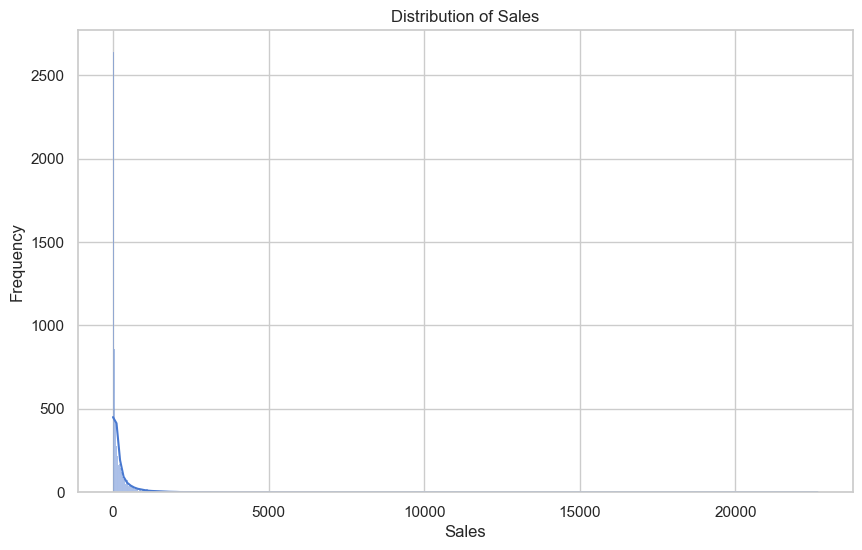

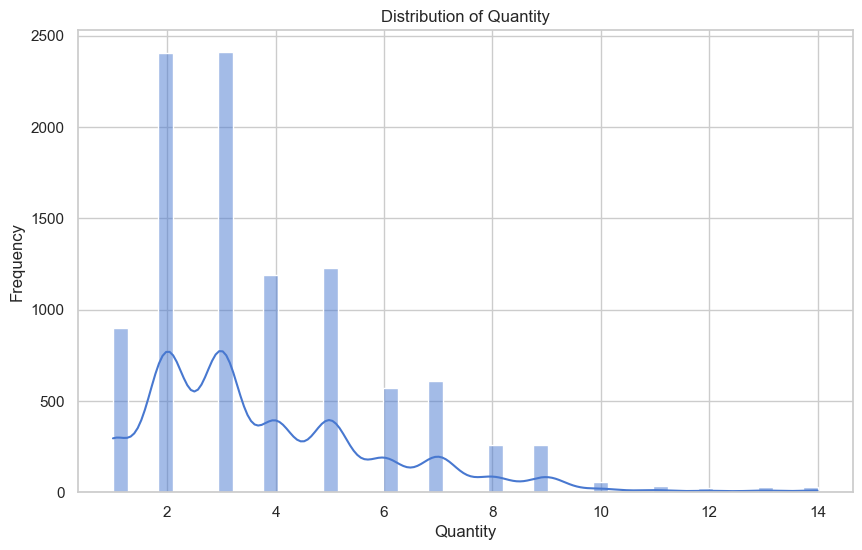

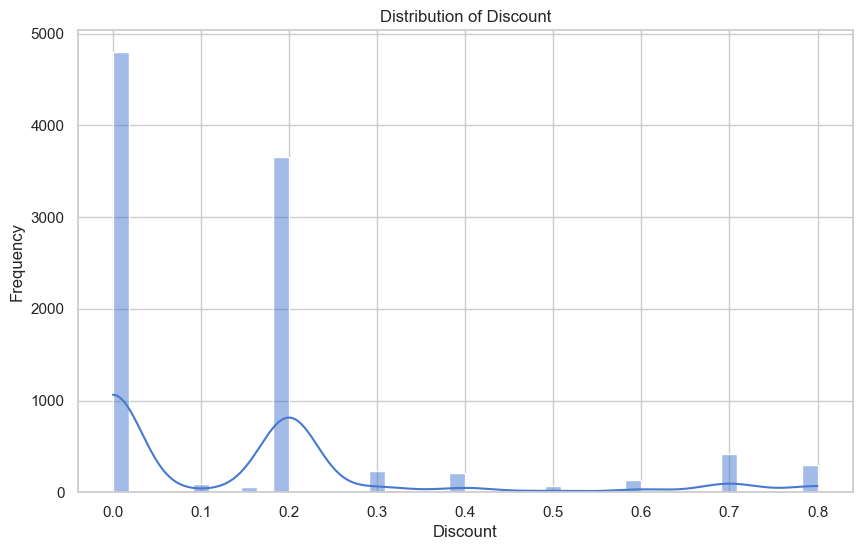

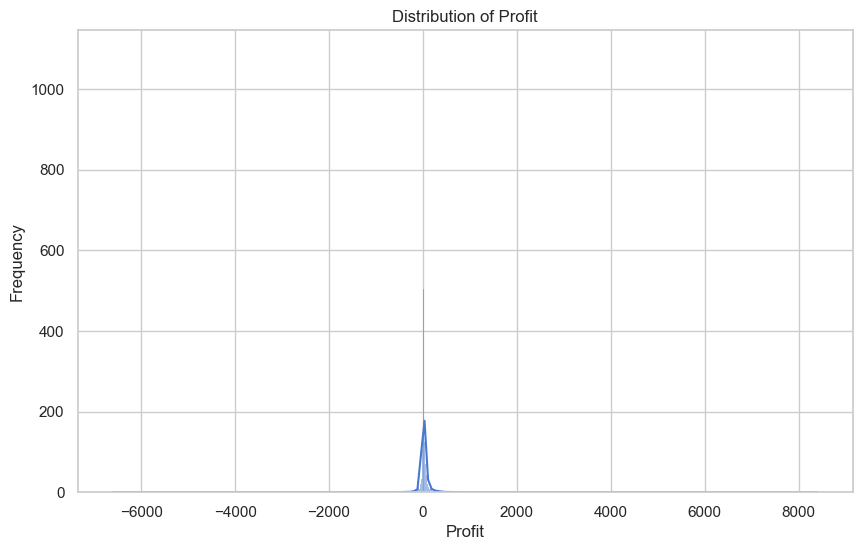

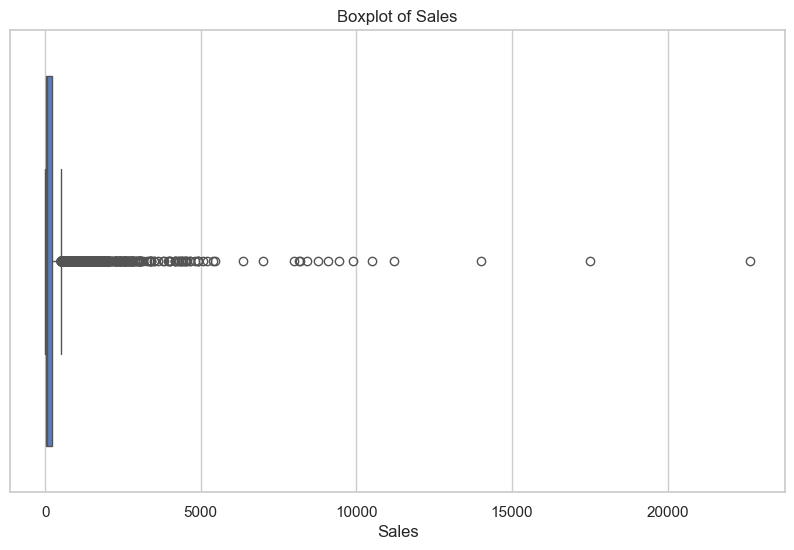

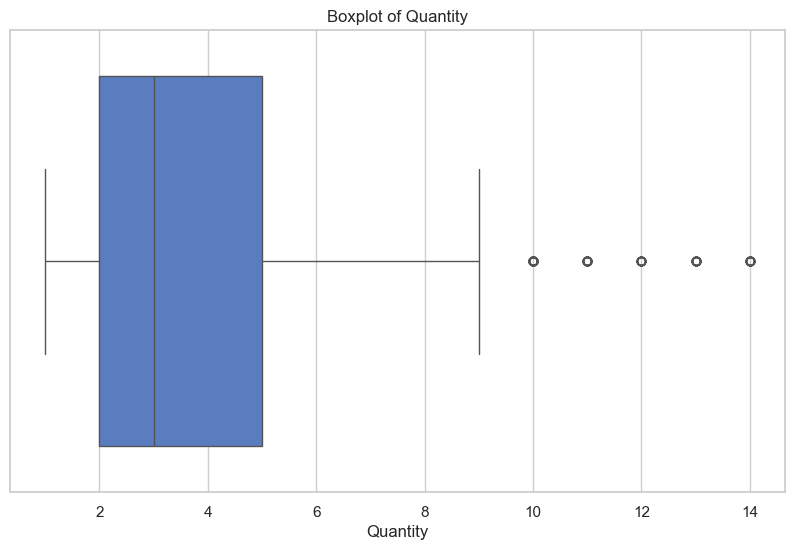

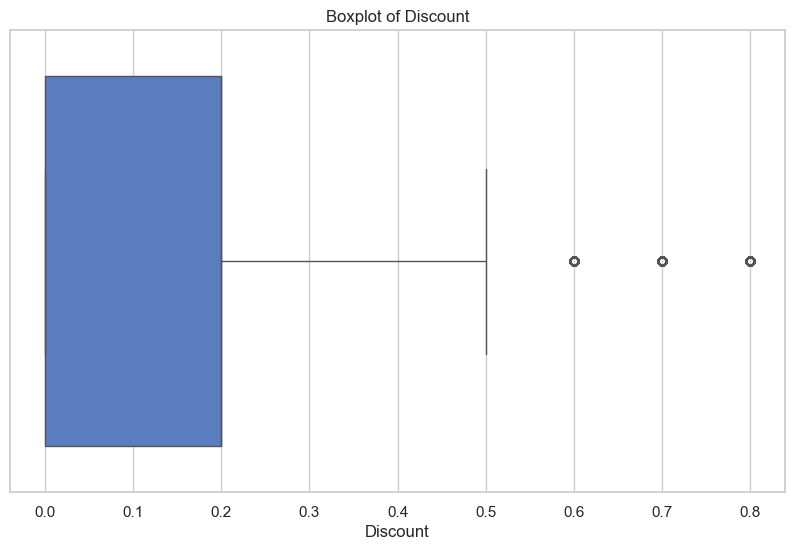

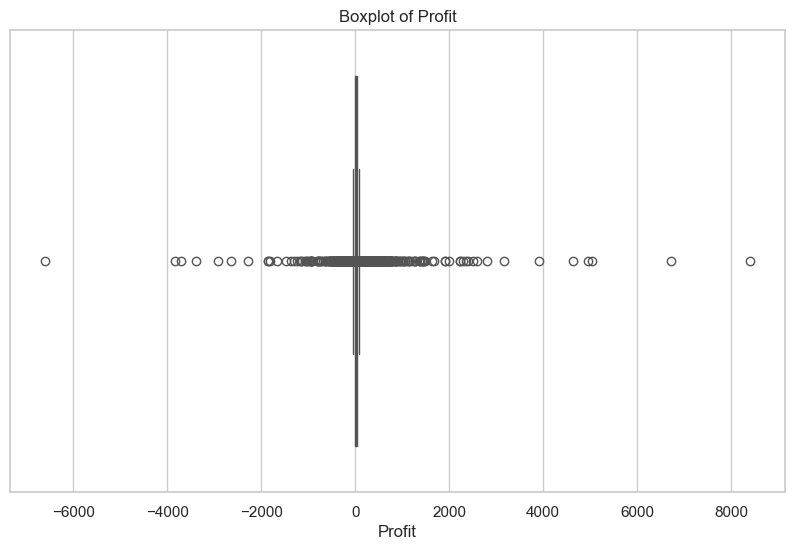

In [9]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df_sel[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Boxplots to identify outliers
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df_sel[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


In [10]:
print("\n=== DATA QUALITY REPORT SUMMARY ===")
print(f"- Total rows: {df_sel.shape[0]}")
print(f"- Total columns selected: {df_sel.shape[1]}")
print("- Columns and data types:\n", df_sel.dtypes)
print("- Missing values (%):\n", missing_pct[missing_pct > 0])
print(f"- Duplicate rows: {dup_count}")
print("- Note: Negative or zero values in key metrics (e.g., Profit) should be inspected.")
print("- After conversion, 'Order Date' or 'Ship Date' may have NaT if parsing failed — check for these.")



=== DATA QUALITY REPORT SUMMARY ===
- Total rows: 9994
- Total columns selected: 16
- Columns and data types:
 Order ID                object
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode               object
Customer ID             object
Segment                 object
Country                 object
City                    object
State                   object
Region                  object
Category                object
Sub-Category            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object
- Missing values (%):
 Series([], dtype: float64)
- Duplicate rows: 1
- Note: Negative or zero values in key metrics (e.g., Profit) should be inspected.
- After conversion, 'Order Date' or 'Ship Date' may have NaT if parsing failed — check for these.
